# Práctica 1.1 - NNs (2024-2025) - Aprendizaje Profundo (Grado en IA)

|Integrantes|Correo electrónico|
|-----------|------------------|
|Hugo Fole Abellás|hugo.fole.abellas@udc.es|
|José Romero Conde|j.rconde@udc.es|


En esta práctica realizaremos un entrenamiento de una red neuronal. Dicha red será entrenada con el dataset **CIFAR-10**, el cual contiene 60.000 imágenes a color de tamaño 32×32 de las que 50.000 se usarán para el entrenamiento de la red y 10.000 para testearla. 

Las imágenes pertenecen a las 10 posibles categorı́as (6.000 imágenes por categorı́a).

Inicialmente, importaremos las librerías a utilizar.

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

A continuación, importaremos el dataset que será usado para entrenar la red que crearemos más adelante. Cabe recalcar que este dataset ya viene divido en dos lotes,como ya dijimos antes. Un lote de entrenamiento que contiene 50.000 instacias y otro de validación de 10.000.

In [2]:
from keras.datasets import cifar10

(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

## NORMALIZACIÓN DE LOS DATOS
Para poder trabajar de manera correcta con este dataset, deberemos seguir ciertos procesos de normalización de datos, de manera que, o bien optimicemos su tiempo de ejecución o bien nos permita trabajar con el dataset. Estos procesos son :

    1. Realizar One-hot encoding en los targets.
    2. Normalizar los valores de las imágenes a float, ya que vienen en valores de 0 a 255.
    3. Aplanar cada imagen para que sean vectores y no matrices.

### 1. One-hot encoding
Como ya comentamos, haremos one-hot en los targets de nuestro dataset ya que vienen divididos en 10 tipos de salidas categóricas representadas por números. Las diferentes salidas las podemos ver en la siguiente tabla.
|Número|Categoría|
|------|---------|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat|
|4|deer|
|5|dog|
|6|frog|
|7|horse|
|8|ship|
|9|truck|

In [3]:
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

### 2.Normalización datos
Como ya dijimos, en este apartado realizaremos la parte de normalización de datos de **uint8** con valores entre [0-255] a **float64**, para que pasen a estar en el rango de valores [0,1] ya que esto nos permite trabajar con redes de neuronas, agiliza el entrenamiento de dichas redes y aumenta la precisión de estas.

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### 3. Aplanar las imágenes

In [5]:
x_train = keras.layers.Flatten()(x_train)
x_test = keras.layers.Flatten()(x_test)

I0000 00:00:1729864613.448311   41163 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-25 15:56:53.448948: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## CREACIÓN RED NEURONAL Y ENTRENAMIENTO
### Introdución a parámetros

Para realizar esta práctica usaremos la librería `keras` para crear redes de neuronas densas, con la función **Sequential**. Dicha función nos permite crear diversas capas de neuronas diferenciando entre : 

`Entrada y salida` : estas capas corresponden al tamaño de los datos de entrada y salida que recibirá nuestra red, en nuestro caso será la capa de entrada de 3072 neuronas (32 pixels x 32 pixels x 3 canales) y de salida 10 (1 por cada categoría).
    
`Ocultas` : estas capas son variables y se realizará un estudio de las posibles composiciones y cuales son mejores.

Previamente a comenzar con las diferentes configuraciones estudiadas, tenemos que asignar ciertos valores a algunos de los atributos de todas las redes.

#### Función de pérdida
La función de pérdida es una medida que evalúa qué tan bien o mal se está desempeñando un modelo en una tarea específica, esto lo hace cuantificando la diferencia entre las predicciones del modelo y los valores reales esperados, proporcionando una métrica numérica que el modelo debe intentar minimizar durante el entrenamiento.

Dado que nuestro problema es de clasificación, ciertas funciones de pérdida quedan descartadas, como pueden ser el `MSE` o el `MAE`.

#### Métricas
Las métricas son funciones que se utilizan para evaluar el rendimiento de un modelo durante y después del entrenamiento. A diferencia de la función de pérdida, que se utiliza para ajustar los pesos del modelo mediante la optimización, las métricas permiten monitorizar el progreso y la calidad del modelo en términos interpretables sin influir directamente en el proceso de aprendizaje.

Como ya comentamos, al tratarse de un problema de clasificación en el cual se diferencian entre diferentes categorías, tendremos que usar funciones de métricas categóricas, como `Categorical Accuracy`.

#### Epochs
Un epoch se corresponde con un ciclo completo de entrenamiento en el que el modelo pasa por todo el conjunto de datos de entrenamiento una vez. Durante un epoch, el modelo utiliza todas las muestras disponibles para ajustar sus parámetros, como los pesos y sesgos de las neuronas, a fin de minimizar la función de pérdida. Utilizaremos diversos números de epochs dependiendo del resto de parámetros y la velocidad de entrenamiento.

#### Batch size 
El tamño del batch es el número de muestras de datos que se pasan al modelo en cada iteración durante el entrenamiento. En otras palabras, en lugar de alimentar al modelo con todo el conjunto de datos de entrenamiento de una sola vez (lo que consumiría mucha memoria y tiempo), dividimos los datos en lotes más pequeños y el modelo ajusta sus pesos después de procesar cada lote.

Dado que tenemos un número alto de patrones, su valor deberá ser acorde para que el entrenamiento no sea excesivamente lento.

#### Validation Split
Este parámetro especifica qué porcentaje del conjunto de datos de entrenamiento debe reservarse para la validación. 

### Función plot
Esta función es la que usaremos para representar las diversas gráficas de pérdidas y precisiones.

In [42]:
def plot(train, validation, title):
    plt.clf()
    epochs = range(1, len(train) + 1)
    
    plt.plot(epochs, train, 'b-o', label='Training ' + title)
    plt.plot(epochs, validation, 'r--o', label='Validation '+ title) 

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()

### Estudio algoritmos optimización y learning rate

Comenzaremos con el estudio de diferentes algoritmos de optimización, entre ellos están:
* `RMSprop()` 
* `Adam()`
* `SGD()`

1. En este primer modelo utilizamos el optmizador `RMSprop`.

In [33]:
model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(3000, activation="relu"),
        keras.layers.Dense(2500, activation="relu"),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dense(40, activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=5000,
    validation_split = .1
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - categorical_accuracy: 0.1021 - loss: 7.0349 - val_categorical_accuracy: 0.0986 - val_loss: 2.2956
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - categorical_accuracy: 0.1122 - loss: 2.2955 - val_categorical_accuracy: 0.1336 - val_loss: 2.2941
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - categorical_accuracy: 0.1138 - loss: 2.2933 - val_categorical_accuracy: 0.0972 - val_loss: 2.2980
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - categorical_accuracy: 0.1070 - loss: 2.3075 - val_categorical_accuracy: 0.1050 - val_loss: 2.2820
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - categorical_accuracy: 0.1143 - loss: 2.2946 - val_categorical_accuracy: 0.1072 - val_loss: 2.2755
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - categorical_accuracy: 0.1110 - loss: 2.2793 - val_categorical_accuracy: 0.1290 - val_loss: 2.2898
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - categorical_accuracy: 0.1135 - loss: 2.2927 - val_categorical_

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - categorical_accuracy: 0.3159 - loss: 1.8506
[1.8541721105575562, 0.3167000114917755]


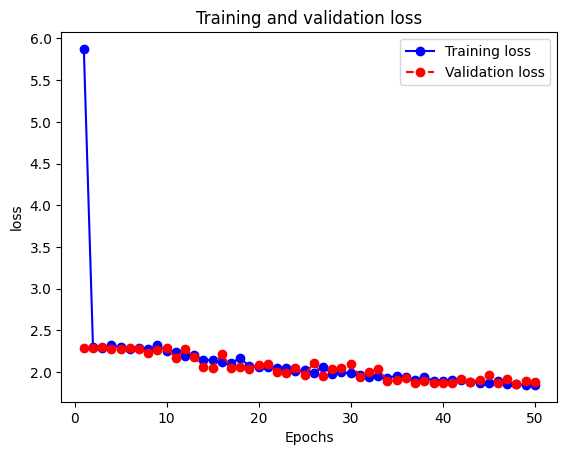

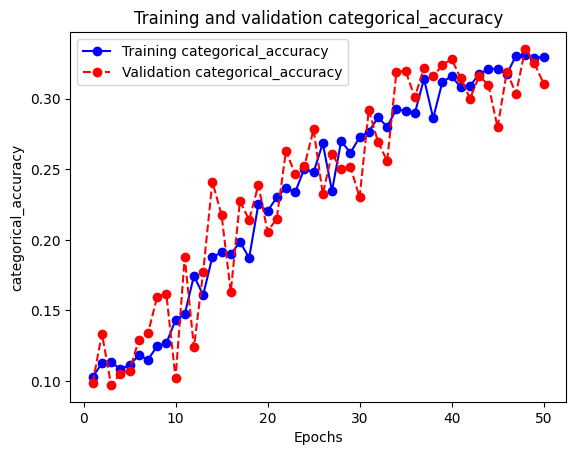

In [43]:
print(model.evaluate(x_test, y_test))
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical_accuracy')

2. En este modelo utilizamos el optimizador `Adam`.

In [28]:
model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(2100, activation="relu"),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dense(600, activation="relu"),
        keras.layers.Dense(640, activation="relu"),
        keras.layers.Dense(205, activation="relu"),
        keras.layers.Dense(70, activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=3000,
    validation_split = .1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - categorical_accuracy: 0.1846 - loss: 2.2400 - val_categorical_accuracy: 0.2648 - val_loss: 2.0364
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 751ms/step - categorical_accuracy: 0.2939 - loss: 1.9739 - val_categorical_accuracy: 0.3316 - val_loss: 1.8787
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 815ms/step - categorical_accuracy: 0.3513 - loss: 1.8369 - val_categorical_accuracy: 0.3556 - val_loss: 1.7944
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 834ms/step - categorical_accuracy: 0.3689 - loss: 1.7749 - val_categorical_accuracy: 0.3838 - val_loss: 1.7520
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 847ms/step - categorical_accuracy: 0.3991 - loss: 1.7105 - val_categorical_accuracy: 0.3830 - val_loss: 1.7232
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 891ms/step - categorical_accuracy: 0.4037 - loss: 1.6782 - val_categorical_accuracy: 0.4188 - val_loss: 1.6615
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 898ms/step - categorical_accuracy: 0.422

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.5300 - loss: 1.3218
[1.3217929601669312, 0.5282999873161316]


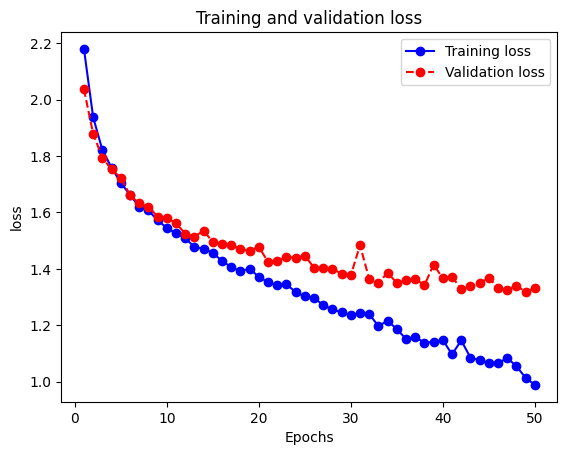

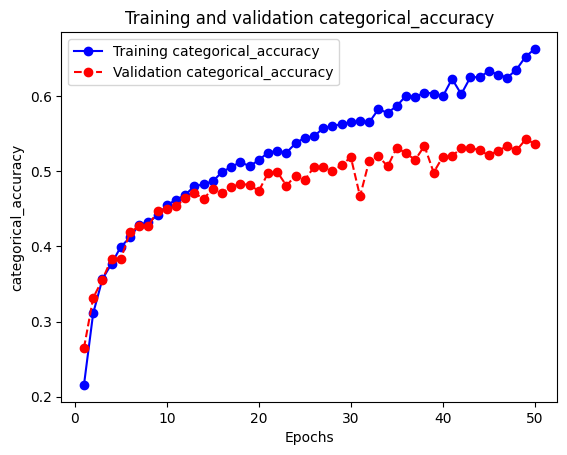

In [29]:
print(model.evaluate(x_test, y_test))
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical_accuracy')

3.  En este último, utilizamos el optimizador `SGD`.

In [52]:
modelSGD = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(2100, activation="relu" ),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dense(600, activation="relu"),
        keras.layers.Dense(640, activation="relu"),
        keras.layers.Dense(205, activation="relu"),
        keras.layers.Dense(70, activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
modelSGD.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])



history = modelSGD.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=3000,
    validation_split = .1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - categorical_accuracy: 0.1052 - loss: 2.2981 - val_categorical_accuracy: 0.1262 - val_loss: 2.2762
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 705ms/step - categorical_accuracy: 0.1233 - loss: 2.2725 - val_categorical_accuracy: 0.1390 - val_loss: 2.2502
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - categorical_accuracy: 0.1421 - loss: 2.2472 - val_categorical_accuracy: 0.1698 - val_loss: 2.2238
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 792ms/step - categorical_accuracy: 0.1673 - loss: 2.2208 - val_categorical_accuracy: 0.1862 - val_loss: 2.1973
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 784ms/step - categorical_accuracy: 0.1796 - loss: 2.1952 - val_categorical_accuracy: 0.1924 - val_loss: 2.1710
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 746ms/step - categorical_accuracy: 0.1891 - loss: 2.1673 - val_categorical_accuracy: 0.2042 - val_loss: 2.1450
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 735ms/step - categorical_accuracy: 0.201

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.3785 - loss: 1.7543
[1.7544244527816772, 0.3765000104904175]


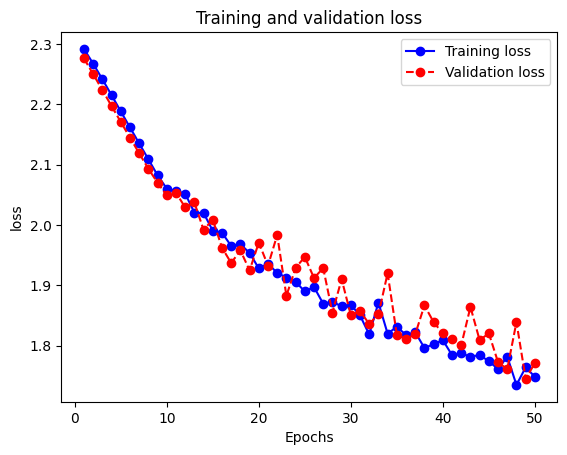

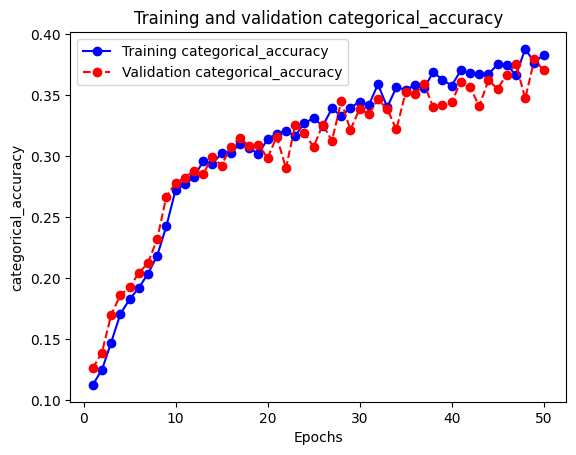

In [53]:
print(modelSGD.evaluate(x_test, y_test))
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical_accuracy')

4. Utilizamos el `Adagrad`.

In [48]:
model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(1500, activation="relu" ),
        keras.layers.Dense(1015, activation="relu", kernel_regularizer=regularizers.l2(0.026)),
        keras.layers.Dense(550, activation="relu", kernel_regularizer=regularizers.l2(0.019)),
        keras.layers.Dense(740, activation="relu", kernel_regularizer=regularizers.l2(0.017)),
        keras.layers.Dense(115, activation="relu", kernel_regularizer=regularizers.l2(0.027)),
        keras.layers.Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.008)),
        keras.layers.Dense(40, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.Adagrad(learning_rate=1e-2),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])



history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=10000,
    validation_split = .1
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - categorical_accuracy: 0.1009 - loss: 112.0458 - val_categorical_accuracy: 0.1020 - val_loss: 110.7778
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - categorical_accuracy: 0.1020 - loss: 110.4288 - val_categorical_accuracy: 0.1062 - val_loss: 109.1817
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - categorical_accuracy: 0.1071 - loss: 108.8378 - val_categorical_accuracy: 0.1144 - val_loss: 107.6107
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - categorical_accuracy: 0.1158 - loss: 107.2724 - val_categorical_accuracy: 0.1306 - val_loss: 106.0636
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.1286 - loss: 105.7303 - val_categorical_accuracy: 0.1244 - val_loss: 104.5400
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.1280 - loss: 104.2113 - val_categorical_accuracy: 0.1310 - val_loss: 103.0395
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.1357 - loss: 102.7

2024-10-25 19:58:03.946039: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.2060 - loss: 95.5668 - val_categorical_accuracy: 0.2076 - val_loss: 94.4921
Epoch 13/50


2024-10-25 19:58:13.818035: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.2120 - loss: 94.1976 - val_categorical_accuracy: 0.2016 - val_loss: 93.1452
Epoch 14/50


2024-10-25 19:58:24.041368: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.2073 - loss: 92.8529 - val_categorical_accuracy: 0.2070 - val_loss: 91.8119
Epoch 15/50


2024-10-25 19:58:34.316920: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.2132 - loss: 91.5253 - val_categorical_accuracy: 0.1974 - val_loss: 90.5131
Epoch 16/50


2024-10-25 19:58:44.527497: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.2094 - loss: 90.2234 - val_categorical_accuracy: 0.2114 - val_loss: 89.2082
Epoch 17/50


2024-10-25 19:58:54.759969: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - categorical_accuracy: 0.2155 - loss: 88.9332 - val_categorical_accuracy: 0.2114 - val_loss: 87.9396
Epoch 18/50


2024-10-25 19:59:05.228600: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2207 - loss: 87.6603 - val_categorical_accuracy: 0.2072 - val_loss: 86.6871
Epoch 19/50


2024-10-25 19:59:15.989769: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2094 - loss: 86.4241 - val_categorical_accuracy: 0.2046 - val_loss: 85.4688
Epoch 20/50


2024-10-25 19:59:26.663266: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2167 - loss: 85.1938 - val_categorical_accuracy: 0.2106 - val_loss: 84.2415
Epoch 21/50


2024-10-25 19:59:37.186256: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2198 - loss: 83.9804 - val_categorical_accuracy: 0.1958 - val_loss: 83.0670
Epoch 22/50


2024-10-25 19:59:47.949508: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2151 - loss: 82.7937 - val_categorical_accuracy: 0.2112 - val_loss: 81.8662
Epoch 23/50


2024-10-25 19:59:59.195871: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2217 - loss: 81.6140 - val_categorical_accuracy: 0.2246 - val_loss: 80.7087
Epoch 24/50


2024-10-25 20:00:09.912909: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2304 - loss: 80.4513 - val_categorical_accuracy: 0.2200 - val_loss: 79.5629
Epoch 25/50


2024-10-25 20:00:20.797947: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2294 - loss: 79.3146 - val_categorical_accuracy: 0.2192 - val_loss: 78.4380
Epoch 26/50


2024-10-25 20:00:32.011182: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2328 - loss: 78.1926 - val_categorical_accuracy: 0.2322 - val_loss: 77.3277
Epoch 27/50


2024-10-25 20:00:43.277293: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2372 - loss: 77.0834 - val_categorical_accuracy: 0.2304 - val_loss: 76.2303
Epoch 28/50


2024-10-25 20:00:53.992005: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2417 - loss: 75.9902 - val_categorical_accuracy: 0.2416 - val_loss: 75.1623
Epoch 29/50


2024-10-25 20:01:04.938371: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2398 - loss: 74.9312 - val_categorical_accuracy: 0.2446 - val_loss: 74.0854
Epoch 30/50


2024-10-25 20:01:16.496110: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2531 - loss: 73.8557 - val_categorical_accuracy: 0.2512 - val_loss: 73.0561
Epoch 31/50


2024-10-25 20:01:27.743645: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2444 - loss: 72.8327 - val_categorical_accuracy: 0.2368 - val_loss: 72.0253
Epoch 32/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2620 - loss: 71.7906 - val_categorical_accuracy: 0.2652 - val_loss: 70.9987
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2613 - loss: 70.7845 - val_categorical_accuracy: 0.2328 - val_loss: 70.0189
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2594 - loss: 69.7846 - val_categorical_accuracy: 0.2684 - val_loss: 69.0141
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2575 - loss: 68.8116 - val_categorical_accuracy: 0.2420 - val_loss: 68.0625
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2558 - loss: 67.8467 - val_categorical_accuracy: 0.2560 - val_loss: 67.1164
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2595 - loss: 66.9053 - val_cate

2024-10-25 20:03:21.413825: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2683 - loss: 63.2321 - val_categorical_accuracy: 0.2606 - val_loss: 62.5463
Epoch 42/50


2024-10-25 20:03:33.286490: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2755 - loss: 62.3369 - val_categorical_accuracy: 0.2682 - val_loss: 61.6578
Epoch 43/50


2024-10-25 20:03:44.663131: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - categorical_accuracy: 0.2647 - loss: 61.4753 - val_categorical_accuracy: 0.2698 - val_loss: 60.8017
Epoch 44/50


2024-10-25 20:03:55.728760: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2769 - loss: 60.6036 - val_categorical_accuracy: 0.2652 - val_loss: 59.9583
Epoch 45/50


2024-10-25 20:04:08.052873: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 123280000 bytes after encountering the first element of size 123280000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2573 - loss: 59.7651 - val_categorical_accuracy: 0.2674 - val_loss: 59.0910
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2730 - loss: 58.9070 - val_categorical_accuracy: 0.2252 - val_loss: 58.3460
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2400 - loss: 58.1662 - val_categorical_accuracy: 0.2698 - val_loss: 57.5017
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2815 - loss: 57.3102 - val_categorical_accuracy: 0.2764 - val_loss: 56.6895
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2779 - loss: 56.5186 - val_categorical_accuracy: 0.2784 - val_loss: 55.8931
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - categorical_accuracy: 0.2832 - loss: 55.7218 - val_categorical_accuracy: 0.2724 - val_loss: 55.1316


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - categorical_accuracy: 0.2756 - loss: 55.1248
[55.12364959716797, 0.28049999475479126]


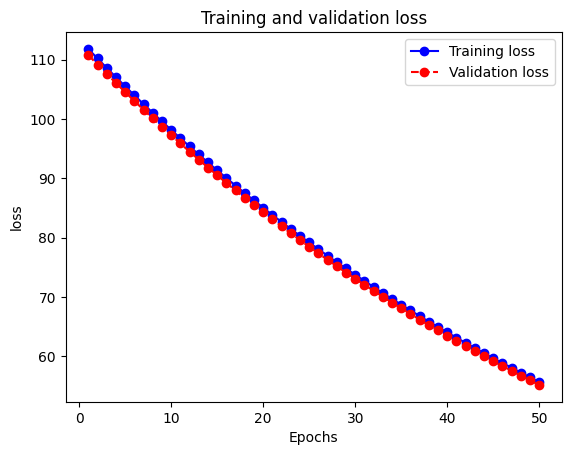

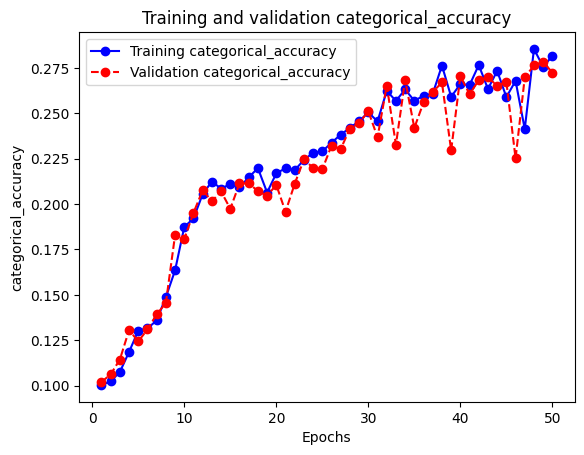

In [49]:
print(model.evaluate(x_test, y_test))X
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical_accuracy')

#### RESULTADOS OPTIMIZADORES
Como podemos observar, el algoritmo optmizador que mejores resultados ha dado es el `Adam`, comparádolo con los otros optimizadores que hemos utilizado, lo consideramos el más completo para este dataset. Esto es debido a que el Adam tiene dos características que comparte tanto con RSMprop como con SGD pero que estos dos no comparten entre ellas.

Explicándolo más a fondo:

Adam y RMSprop comparten  que ambos tienen una tasa de aprendizaje adaptativa, lo cual permite que se ajusten las magnitudes de las actualizaciones de los pesos, lo que ayuda a manejar la variabilidad de los gradientes.

Adam y SGD comparten que ambos utilizan el momento, el cual  permite suavizar la trayectoria de actualización de los pesos, lo que ayuda a evitar oscilaciones y hace que las actualizaciones sean más eficientes en áreas de la función de pérdida donde el gradiente cambia de dirección rápidamente. Lo negativo de utilizar SGD es que suele requerir muchos ciclos de entrenamiento, pero para nuestro dataset, el cual es bastante complejo, no tiene buenos resultados.

### Regularización 
En esta parte, comenzaremos a estudiar los diferentes resultados de la aplicación de distintos tipos de regularización. Como el optimizador Adam ha sido el que mejor resultados ha dado hasta este punto, realizaremos las distintas medidas de regularización con este optimizador. Estas medidas pueden ser:
* `Dropout()`
* `L1()` 
* `L2()`
* `Etc.

Comenzaremos importando la librería para utilizar los diferentes regularizadores.

In [ ]:
from keras import regularizers

#### Dropout

El `Dropout` es una técnica de regularización utilizada para prevenir el overfitting de un modelo. Es la única de las técnicas que veremos que es propia de las redes neuronales y  hace que el espacio de complejidad sea menor y se consigan modelos más sencillos. Consiste en desactivar cierto número de neuronas aleatoriamente, de manera que estas no participan ni en la retopropagación ni en la activación.

In [54]:
modelDropout = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(2100, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(600, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(640, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(205, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(70, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
modelDropout.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
history = modelDropout.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=3000,
    validation_split = .1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 653ms/step - categorical_accuracy: 0.1296 - loss: 2.2933 - val_categorical_accuracy: 0.2302 - val_loss: 2.1469
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 686ms/step - categorical_accuracy: 0.1959 - loss: 2.1517 - val_categorical_accuracy: 0.2886 - val_loss: 1.9901
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 858ms/step - categorical_accuracy: 0.2447 - loss: 2.0360 - val_categorical_accuracy: 0.3154 - val_loss: 1.9108
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 824ms/step - categorical_accuracy: 0.2831 - loss: 1.9570 - val_categorical_accuracy: 0.3352 - val_loss: 1.8522
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 835ms/step - categorical_accuracy: 0.3097 - loss: 1.8943 - val_categorical_accuracy: 0.3458 - val_loss: 1.8080
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 875ms/step - categorical_accuracy: 0.3287 - loss: 1.8605 - val_categorical_accuracy: 0.3744 - val_loss: 1.7581
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 821ms/step - categorical_accuracy: 0.350

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.5532 - loss: 1.3250
[1.334003210067749, 0.5460000038146973]


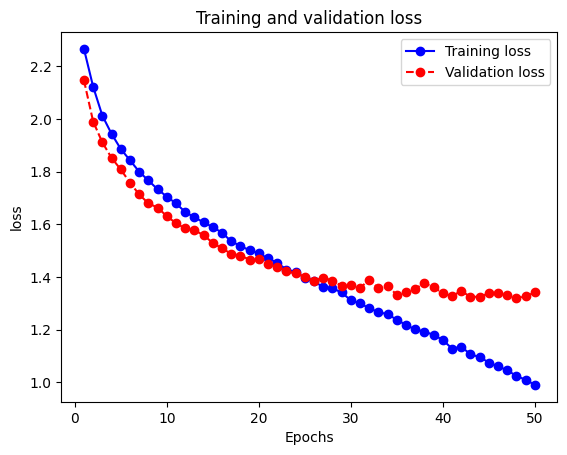

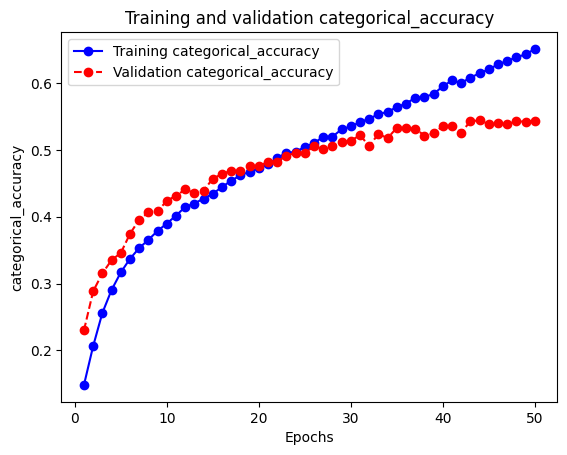

In [55]:
print(modelDropout.evaluate(x_test, y_test))
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical_accuracy')

Como podemos ver en este gráfico, obtenemos un valor más que aceptable de `accuracy`, pero aunque este valor sea bueno, podemos decir que el modelo está sobreentrenado porque la tasa de acirto con los datos de entrenamiento sigue creciendo pero en cambio la tasa de acierto con los datos de validación se _estanca_ y no sigue aumentando. Esto se puede deber a que escogimos un valor de dropout inadecuado.

### L1

Esta ingeniosa técnica de regularización tiene una poderosa propiedad, la selección de pesos. Es decir, consigue su propósito regularizador por supuesto minimizando la norma de los pesos pero como lo hace con la norma L1 puede ser que algún $w_{ijk} = 0$ y esto es útil para la ligereza e interpretabilidad de la red. Podríamos aprender los hiperparámetros de la penalización (y `Keras` tiene un soporte nativo para ello pero es tanta la computación que necesita que nuestros ordenadores simplemente no pudieron con ello (además de que probablemente hayamos echo algo mal en nuestro intento de aprender los hiperparámetros). Es por todo esto que los hemos fijado de antemano a un valor bajo porque o si no tendrá tanto efecto que no podremos aprender funciones complicadas. Y evidentemente clasificar un tensor como un avión o una rana es una función complicada. 

In [58]:
modelL1 = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(2100, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(1000, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(600, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(640, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(205, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(70, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
modelL1.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
historyL1 = modelL1.fit(
    x_train,
    y_train,
    epochs=80,
    batch_size=3000,
    validation_split = .1
)

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - categorical_accuracy: 0.1815 - loss: 36.1297 - val_categorical_accuracy: 0.2766 - val_loss: 35.1209
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.2891 - loss: 34.8040 - val_categorical_accuracy: 0.3108 - val_loss: 33.9234
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - categorical_accuracy: 0.3237 - loss: 33.6532 - val_categorical_accuracy: 0.3296 - val_loss: 32.8942
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.3487 - loss: 32.6386 - val_categorical_accuracy: 0.3582 - val_loss: 31.9265
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.3686 - loss: 31.6842 - val_categorical_accuracy: 0.3694 - val_loss: 31.0224
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - categorical_accuracy: 0.3791 - loss: 30.7900 - val_categorical_accuracy: 0.3828 - val_loss: 30.1596
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - categorical_accuracy: 0.3938 - loss:

2024-10-25 21:40:53.316065: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 36984000 bytes after encountering the first element of size 36984000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5096 - loss: 12.3519 - val_categorical_accuracy: 0.4886 - val_loss: 12.3411
Epoch 58/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5121 - loss: 12.2527 - val_categorical_accuracy: 0.4856 - val_loss: 12.2527
Epoch 59/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5061 - loss: 12.1812 - val_categorical_accuracy: 0.4836 - val_loss: 12.1668
Epoch 60/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5125 - loss: 12.0815 - val_categorical_accuracy: 0.4830 - val_loss: 12.0873
Epoch 61/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5126 - loss: 11.9915 - val_categorical_accuracy: 0.4864 - val_loss: 11.9937
Epoch 62/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5095 - loss: 11.9157 - val_categorical_accuracy: 0.4822 - val_loss: 11.9243
Epoch 63/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - categorical_accuracy: 0.5090 - loss: 11.8

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - categorical_accuracy: 0.4879 - loss: 10.7290
[10.732978820800781, 0.48840001225471497]


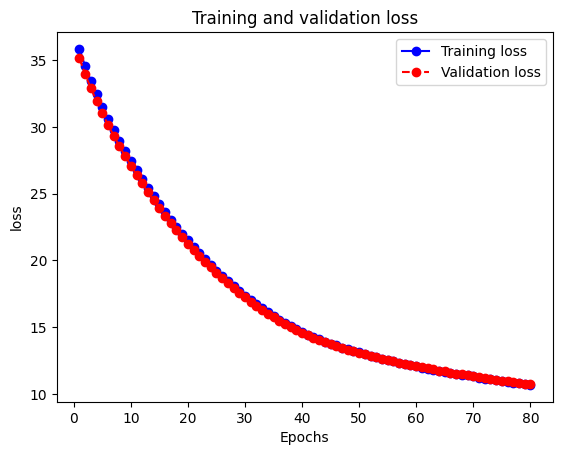

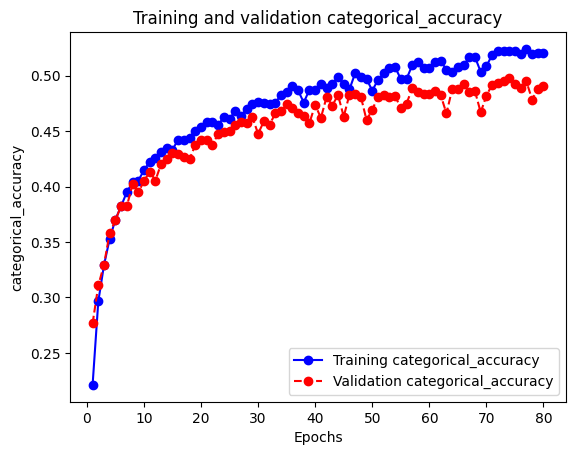

In [60]:
print(modelL1.evaluate(x_test, y_test))
plot(historyL1.history['loss'], historyL1.history['val_loss'], 'loss')
plot(historyL1.history['categorical_accuracy'], historyL1.history['val_categorical_accuracy'], 'categorical_accuracy')

Observación de los resultados: \
Aunque $\lambda$ no era grande vemos que hizo bastante efecto en el sentido de que no se puede decir que observemos un gran nivel de sobreajuste. Pues por supuesto que hay mejores predicciones con los datos de entrenamiento que con los de validación, pero esto es lógico. No observamos, en cambio, que sean muy dispares. Y sobretodo la función de pérdida se comporta muy pareja. 

Una consecuencia de la regularización es que vemos que el entrenamiento se estanca en un peor nivel de precisión porque simplemente hemos _capado_ a la red de que funciones va a ser capaz de aprender.

### L2

No hay nada más natural para nosotros que el espacio euclídeo, en el las cosas se miden según L2. Es por eso que es bastante razonable medir que tan grande es $\mathbf{W}$ con L2. Esta es la forma más símetrica de hacerlo en el sentido de que _reducirá_ a todos los pesos más o menos lo mismo. Además (y esto reconocemos está fuera del alcance de la práctica) usar L2 es equivalente a decir que tenemos una idea _a priori_ de la distribución que va a seguir $\mathbb{E}(\mathbf{W})$, en concreto una Normal con matriz de varianza-covarianza $(1/\lambda) I$.

In [63]:
modelL2 = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(2100, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(600, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(640, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(205, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(70, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
modelL2.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
historyL2 = modelL2.fit(
    x_train,
    y_train,
    epochs=80,
    batch_size=3000,
    validation_split = .1
)

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 689ms/step - categorical_accuracy: 0.1871 - loss: 3.1072 - val_categorical_accuracy: 0.2740 - val_loss: 2.8979
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 713ms/step - categorical_accuracy: 0.3001 - loss: 2.8416 - val_categorical_accuracy: 0.3178 - val_loss: 2.7383
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 764ms/step - categorical_accuracy: 0.3470 - loss: 2.6930 - val_categorical_accuracy: 0.3616 - val_loss: 2.6560
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 820ms/step - categorical_accuracy: 0.3714 - loss: 2.6187 - val_categorical_accuracy: 0.3740 - val_loss: 2.5922
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 836ms/step - categorical_accuracy: 0.3908 - loss: 2.5592 - val_categorical_accuracy: 0.3964 - val_loss: 2.5325
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 835ms/step - categorical_accuracy: 0.4117 - loss: 2.4940 - val_categorical_accuracy: 0.3934 - val_loss: 2.5111
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 853ms/step - categorical_accuracy: 0.414

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - categorical_accuracy: 0.5548 - loss: 1.9457
[1.9421772956848145, 0.5516999959945679]


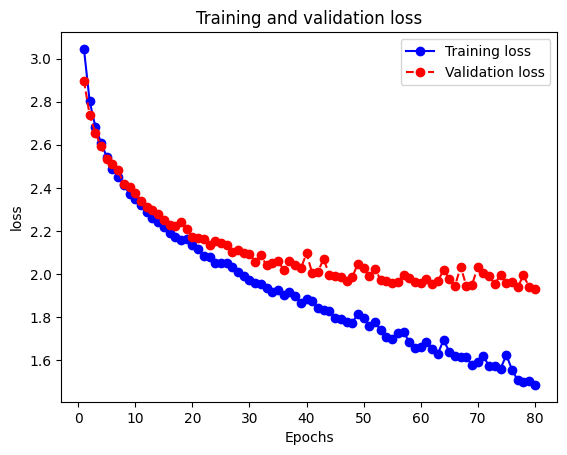

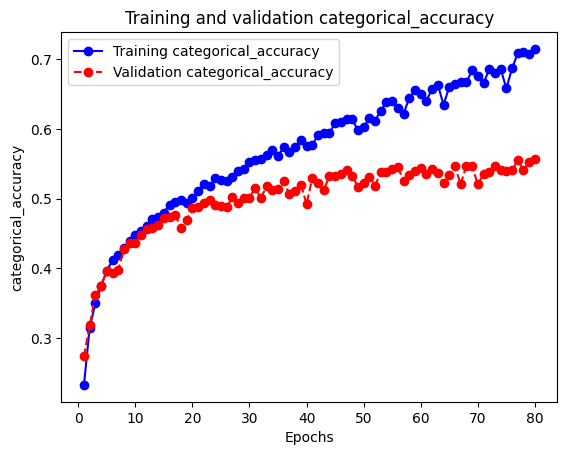

In [64]:
print(modelL2.evaluate(x_test, y_test))
plot(historyL2.history['loss'], historyL2.history['val_loss'], 'loss')
plot(historyL2.history['categorical_accuracy'], historyL2.history['val_categorical_accuracy'], 'categorical_accuracy')

#### ELASTIC NET

La fusión de la ancestral técnica regularizadora del genio soviético Tichonoff (L2) y del (vivo) americano Robert Tibshirani (L1) se le conoce como Elastic Net, que como Hannah Montana tiene lo mejor de los dos mundos. Por un lado no perdemos la propiedad seleccionadora y además tenemos una _reducción_ homogénea.

In [61]:
ElasticNet = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(2100, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(1000, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(600, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(640, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(205, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(70, activation="relu", kernel_regularizer=regularizers.L1L2(l1=0.0001,l2=0.0001)),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
ElasticNet.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
historyEL = ElasticNet.fit(
    x_train,
    y_train,
    epochs=80,
    batch_size=3000,
    validation_split = .1
)

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 694ms/step - categorical_accuracy: 0.1781 - loss: 37.0113 - val_categorical_accuracy: 0.2738 - val_loss: 35.9914
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 829ms/step - categorical_accuracy: 0.2975 - loss: 35.6661 - val_categorical_accuracy: 0.3128 - val_loss: 34.7721
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 914ms/step - categorical_accuracy: 0.3288 - loss: 34.4978 - val_categorical_accuracy: 0.3412 - val_loss: 33.7253
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 840ms/step - categorical_accuracy: 0.3512 - loss: 33.4758 - val_categorical_accuracy: 0.3532 - val_loss: 32.7623
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 863ms/step - categorical_accuracy: 0.3636 - loss: 32.5184 - val_categorical_accuracy: 0.3754 - val_loss: 31.8319
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 851ms/step - categorical_accuracy: 0.3803 - loss: 31.6004 - val_categorical_accuracy: 0.3744 - val_loss: 30.9664
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 852ms/step - categorical_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - categorical_accuracy: 0.4864 - loss: 10.8560
[10.861623764038086, 0.47850000858306885]


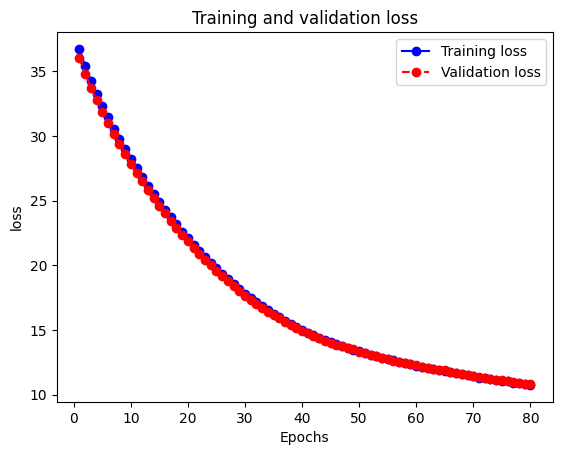

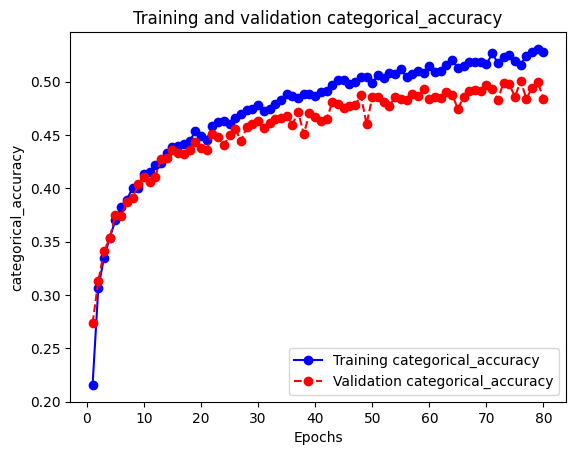

In [62]:
print(ElasticNet.evaluate(x_test, y_test))
plot(historyEL.history['loss'], historyEL.history['val_loss'], 'loss')
plot(historyEL.history['categorical_accuracy'], historyEL.history['val_categorical_accuracy'], 'categorical_accuracy')

## CONCLUSIÓN

Ha sido una gran experiencia realizar esta práctica, dóode descubrimos la velocidad y particularidades de algunos algoritmos de optimización (bajo nuestros dedos y no sobre una pizarra). Ahí pudimos apreciar que unas pequeñas sutilezas pueden gobernar por completo la ejecución del aprendizaje (véase: el `learning_rate`). También (para consiguir nuestra deseada generalización) hicimos uso de regularizadores, que fuimos probando de forma individual y conjunta. De nuestros experimentos apreciamos que, por lo menos con los $\lambda$s escogidos, conseguimos menores diferencias entre entrenamiento y validación con L1 y ElasticNet (que también usa L1). En cambio L2 fue la que mejor tasa de acierto de test nos dió, un $0.552$, que si nos lo dijeran al empezar la práctica pensaríamos que es muy poco pero ahora sabemos que lleva su esfuerzo. 